<a href="https://colab.research.google.com/github/MrckHckr/orbit-validation/blob/main/notebooks/validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build the environment

In [ ]:
# Copy the GitHub project to Colab
!git clone https://github.com/MrckHckr/orbit-validation.git


Cloning into 'orbit-validation'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 41 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (41/41), 10.83 KiB | 2.71 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
# Inspect the project
!apt-get install -y tree
!tree orbit-validation



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (89.0 kB/s)
Selecting previously unselected package tree.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
orbit-validation
├── figures
├── notebooks
│   └── validation.ipynb
├── README.md
├── requirements.txt
└── src
    ├── coord_utils.py
    ├── __init__.py
    ├── src
    │   └── time_utils.py
    └── time_utils.py

4 directories, 7 files


In [ ]:
# Let's tell Python where to find the repository code
import sys
from pathlib import Path

repo_root = Path("/content/orbit-validation")
sys.path.insert(0, str(repo_root))

print("PYTHONPATH OK:", repo_root)



PYTHONPATH OK: /content/orbit-validation


In [ ]:
# See what's inside the repository
!ls /content/orbit-validation


figures  notebooks  README.md  requirements.txt  src


In [ ]:
# Converts a UTC → TT date, used to validate an orbital propagator
from src.time_utils import utc_to_tt

t_tt = utc_to_tt("2025-01-01T12:00:00")
print("TT:", t_tt.iso)
print("JD:", t_tt.jd)


TT: 2025-01-01 12:01:09.184
JD: 2460677.000800741


Coordinates, reference frame, validation

In [1]:
#Create starting coordinates (ICRS)
from astropy.coordinates import SkyCoord
import astropy.units as u

coord_icrs = SkyCoord(
    ra=120.0 * u.deg,
    dec=22.0 * u.deg,
    frame="icrs"
)

coord_icrs


<SkyCoord (ICRS): (ra, dec) in deg
    (120., 22.)>

In [2]:
#Observation time
from astropy.time import Time

obstime = Time("2025-01-01T12:00:00", scale="utc")
obstime


<Time object: scale='utc' format='isot' value=2025-01-01T12:00:00.000>

In [5]:
#ICRS → GCRS transformation
from astropy.coordinates import GCRS

coord_gcrs = coord_icrs.transform_to(
    GCRS(obstime=obstime)
)

coord_gcrs



<SkyCoord (GCRS: obstime=2025-01-01T12:00:00.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec) in deg
    (120.0058545, 21.99885689)>

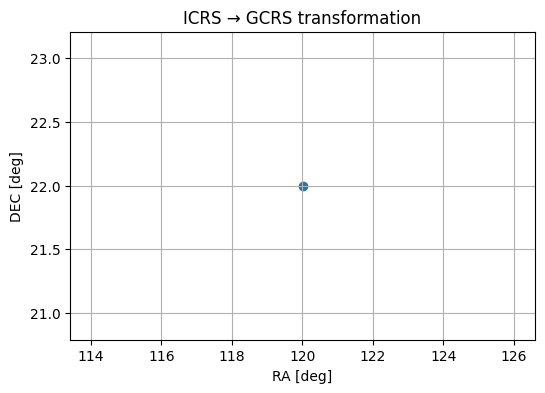

In [6]:
# Visual validation
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(coord_gcrs.ra.deg, coord_gcrs.dec.deg)
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")
plt.title("ICRS → GCRS transformation")
plt.grid()
plt.show()


In [7]:
# Save results
import pandas as pd

df = pd.DataFrame({
    "ra_gcrs_deg": [coord_gcrs.ra.deg],
    "dec_gcrs_deg": [coord_gcrs.dec.deg],
    "obstime_utc": [obstime.isot]
})

df


,ra_gcrs_deg,dec_gcrs_deg,obstime_utc
0,120.005854,21.998857,2025-01-01T12:00:00.000
